<img style="float:left" width="40%" src="images/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="12%" src="images/PythonLogo.svg">
<br style="clear:both;">

# Sistemas Inteligentes aplicados en Salud

<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">Práctica I: Procesado de imágenes de tomografía computerizada</h2>
<br style="clear:both;">
<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: orange; line-height: 1.3em; color: white; border-radius: 10px;">Enunciado y requisitos</h2>

### Grado en Ingeniería de la Salud 

  **Curso 24-25**


## Porcentaje de calificación total

La Práctica 1 (**Procesado de imágenes de tomografía computerizada**) tendrá un peso del **25%** en el total de la calificación de la parte de prácticas de la asignatura y realizará en grupos de **dos personas**.

------------------
# Supuesto práctico

Se dispone de varias carpetas en las que se encuentran imágenes de CT de diferentes sujetos y diferentes tipos de adquisiciones (cerebral, torax, cuerpo completo) en formato Dicom. 
El departamento de radiología del hospital en el que estás trabajando solicita la realización de un procesamiento de dichas imágenes de forma que se obtenga la imagen segmentada en el mayor número de regiones posible para cada uno de los sujetos. [Enlace Carpeta Dicom](https://universidaddeburgos-my.sharepoint.com/:f:/g/personal/dgarcia1_ubu_es/EulgGhas0zZBg59Pw-MJrAcBAgFMLcTmDtilYzhZBlLcfw?e=oKjpbI) 


# Introducción


## Tomografía Computarizada (TC)

El término "tomografía computarizada", o TC, se refiere a un procedimiento computarizado de toma de imágenes con rayos X en el que se proyecta un haz angosto de rayos X a un paciente y se gira rápidamente alrededor del cuerpo, produciendo señales que son procesadas para generar imágenes transversales, o "cortes". Estos cortes se llaman imágenes tomográficas y pueden brindar al médico información más detallada que las radiografías convencionales. Una vez se recopilan varios cortes sucesivos, estos se pueden "apilar" digitalmente para formar una imagen tridimensional del paciente que permite identificar más fácilmente las estructuras básicas, así como posibles tumores o anomalías.

<img style="float:center" width="50%" src="images/TAC_scanner.jpg">



## Unidades de medida en TC

La escala de Unidades Hounsfield (‘escala Hounsfield’ o ‘escala de números TC’) nombrada en honor del ingeniero y Premio Nobel de Fisiología o Medicina inglés Sir Godfrey Newbold Hounsfield, es una escala cuantitativa utilizada en los estudios de tomografía computarizada (TC) para describir los diferentes niveles de radiodensidad de los tejidos humanos. 


<img style="float:center" width="50%" src="images/tabla_hounsfield.png">

A partir de los datos almacenados en la imagen Dicom de un CT, podemos obtener los valores en unidades Hounsfield empleando la siguiente fórmula: 

                ValorHounsfield = m*SV + b
donde:
- *m* es el valor de reescalado de la pendiente
- *b* es el valor constante de intercepción
- *SV* son los valores almacenados en la imagen dicom 


Podemos encontrar estos valores en la cabecera Dicom de la imagen en los siguientes campos:

>**Rescale Intercept** (0028,1052) es `b` en la ecuación 

>**Rescale Slope** (0028,1053) es `m` en la ecuación

**Referencia**: https://dicom.nema.org/Dicom/CP/CPack-32_PDF/cp519_lb.pdf

## Tareas a realizar:

### Paso 1

- Implementar la función `Load_Slices()`: Permite la carga de los archivos DICOM que se encuentren en una carpeta.
    - **Parametros de entrada**: Directorio en el que se encuentran las imágenes. Permite al usuario elegir el directorio con el cual se desea trabajar. (Hint: puede ser interesante emplear `tkinter` antes de la llamada de esta función poder realizar la carga de forma manual)
    - **Parametros de salida**: Devuelve una estructura de datos en la que se encuentra la información obtenida de `pydicom`relativa a los archivos DICOM que se encuentren en la carpeta seleccionada.
- Implementar la función `CreaVolumen()`. Permite crear un volumen a partir de archivos DICOM. 
    - **Parametros de entrada**: estructura de datos que contenga la información de las imágenes seleccionadas mediante la función `Load_Slices()`.
    - **Parametros de salida**: Devuelve:
        - array con los datos de todas las imágenes
        - tamaño de la imagen completa en vóxeles
        - relación de aspecto de cada una de las vistas
        - tamaño del voxel

<div class="alert alert-info"> <b>IMPORTANTE: </b> Es necesario convertir los datos almacenados en cada imagen a unidades Hounsfield.</div>

- Implementar la función `MetadataCT()`. Esta función debe mostrar por pantalla un informe con algunos de los metadatos principales:
    - **Parametros de entrada**: estructura de datos que contenga la información (metadatos) de las imágenes seleccionadas mediante la función `Load_Slices()`. 
    - **Parametros de salida**:
        - Nombre del sujeto
        - Edad del sujeto
        - Sexo del sujeto
        - Tipo de imagen
        - Fecha de adquisición
        - Modelo de tomógrafo en la que se realizó la prueba de imagen
        - Tipo de adquisición (corte)
        - Tamaño del vóxel
        - Tamaño de la imagen completa
            - En mm
            - En vóxeles
    
- Implementar la función `MuestraVolumen()` que muestre el corte medio del volumen en las tres vistas (axial, sagital y coronal) y de forma opcional, el histograma de la imagen 3D.
    - **Parametros de entrada**: Esta función toma como parámetros de entrada los parámetros de salida de la función `CreaVolumen()` y un flag que indique si se muestra el histograma o no de la imagen.
    - **Parametros de salida**: No devuelve ningún parámetro. Muestra por pantalla un resultado similar al que se muestra en la siguiente figura:
<img style="float:center" width="50%" src="images/ejemplo_visualizador_final.png">

- Comprobar que las funciones implementadas funcionan correctamente para todas y cada una de las TC proporcionadas.

### Paso 2 
- Implementar las funciones necesarias para realizar los siguientes procesos de segmentación:
    - Realizar segmentación de los diferentes tejidos en CT mediante umbralización de valores Hounsfield (HU).
    - Realizar segmentación de los diferentes tejidos en CT mediante threshold Otsu.
<div class="alert alert-info"> <b>HINT: </b> Emplea la TC que se encuentra almacenada en la carpeta <kbd>DICOM_template</kbd> como base para comenzar a trabajar. Se trata de una imagen creada de forma artificial en la que cada tejido viene caracterizado por un valor en HU específico.</div>

**Guarda cada una de las imágenes obtenidas del ortovisor en .png o .jpg**

**Cada una de estas funciones puede tener asociadas otras subfunciones dependiendo de la estrategia de implementación realizada.** 

**Debes elegir convenientemente las estructuras o datos que devuelve cada una de las funciones.**   

### Paso 3 
- Realizar un informe con los resultados de segmentación obtenidos para cada una de las imágenes proporcionadas, en el que se incluyan figuras de la imagen original y de la imagen segmentada.

### Paso 4 (Avanzado)
Emplear la función `SaveImageNRRD()` que se proporciona para guardar las segmentaciones en formato `nrrd` (https://en.wikipedia.org/wiki/Nrrd).

Con esta función, se genera un archivo `nrrd` a partir de los siguientes parámetros de entrada:
- Directorio de escritura: `directory`
- Nombre de la imagen: `filename`
- Array con los datos de la imagen: `img3d`
- Tamaño del voxel: `tam_vox` incluye el tamaño del voxel en mm de cada una de las tres vistas.

```Python
def SaveImageNRRD(directory,filename,img3d,tam_vox):
    import nrrd
    import numpy as np
    import os
    ones = np.ones(img3d.shape)
    imagen_r_3D=np.rot90(np.flip(ones*img3d,2),3)
    space_directions= [[-tam_vox[0], 0.   , 0.   ],
       [0.   , -tam_vox[1], 0.   ],
       [0.   , 0.   , tam_vox[2]   ]]
    header = {'space directions':space_directions}     
    # Write to a NRRD file
    nrrd.write(directory + os.sep + filename + '.nrrd', imagen_r_3D, header)
```
Cuando se ejecuta correctamente esta función, se obtiene un archivo que contiene la imagen almacenada con formato `nrrd`. Puedes emplear el programa `MRIcroGL`: https://github.com/rordenlab/MRIcroGL con el cual podrás visualizar de forma tridimensional mediante un render la segmentación que hayas realizado.




In [1]:
from modules.archivo import Load_Slices

In [ ]:
from tkinter import filedialog
foldername=filedialog.askdirectory(title="Selecciona una carpeta")
Load_Slices(foldername)

In [45]:
from modules.archivo import CreaVolumen

In [46]:
CreaVolumen(Load_Slices(foldername))

Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0001.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0002.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0003.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0004.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0005.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0006.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0007.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0008.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0009.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0010.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0011.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0012.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0013.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM

(array([[[-1000., -1000., -1000., ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000., ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000., ..., -1000., -1000., -1000.],
         ...,
         [-1000., -1000., -1000., ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000., ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000., ..., -1000., -1000., -1000.]],
 
        [[-1000., -1000., -1000., ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000., ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000., ..., -1000., -1000., -1000.],
         ...,
         [-1000., -1000., -1000., ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000., ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000., ..., -1000., -1000., -1000.]],
 
        [[-1000., -1000., -1000., ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000., ..., -1000., -1000., -1000.],
         [-1000., -1000., -1000., ..., -1000., -1000., -1000.],
      

In [30]:
from modules.archivo import MetadataDT

In [47]:
MetadataDT(Load_Slices(foldername))

Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0001.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0002.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0003.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0004.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0005.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0006.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0007.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0008.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0009.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0010.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0011.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0012.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0013.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM

{'Nombre del sujeto': 'Sujeto_D',
 'Edad del sujeto': 'No disponible',
 'Sexo del sujeto': '',
 'Tipo de imagen': 'CT',
 'Fecha de adquisición': 'No disponible',
 'Modelo del tomógrafo': 'Unknown model',
 'Espesor del corte': '1.0',
 'Tamaño voxel': ('1.0', '1.0', '1.0'),
 'Tamaño imagen completa en voxeles': (512, 512),
 'Tamaño imagen completa en mm': (512.0, 512.0)}

In [48]:
from modules.archivo import MuestraVolumen



Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0001.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0002.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0003.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0004.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0005.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0006.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0007.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0008.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0009.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0010.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0011.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0012.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0013.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM

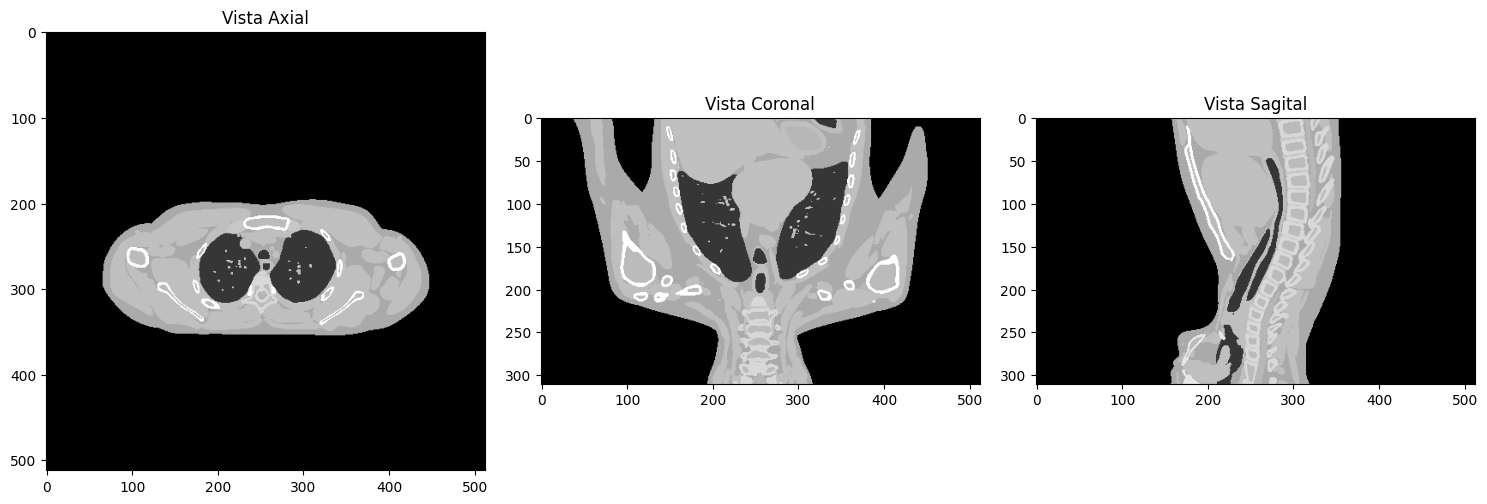

In [49]:
foldername = filedialog.askdirectory(title="Selecciona una carpeta")
imagenes = Load_Slices(foldername)
volumen, img_shape, aspectos, tamaño_voxel = CreaVolumen(imagenes)

# Obtener los metadatos de las imágenes
metadatos = MetadataDT(imagenes)
modalidad = metadatos['Tipo de imagen']  # Extraemos 'Tipo de imagen' del primer conjunto de metadatos
paciente = metadatos['Nombre del sujeto']  # Extraemos 'Nombre del sujeto' del primer conjunto de metadatos

MuestraVolumen(volumen, img_shape, aspectos[0], aspectos[1], aspectos[2])





Para que te muestre la que quieres tienes que escribir en tipo_corte el corte deseado, ya sea axial, coronal o sagital. Esto se aplica para ambas segmentaciones.

In [50]:
from modules.archivo import segmentacion_hu
from modules.archivo import mostrar_segmentaciones

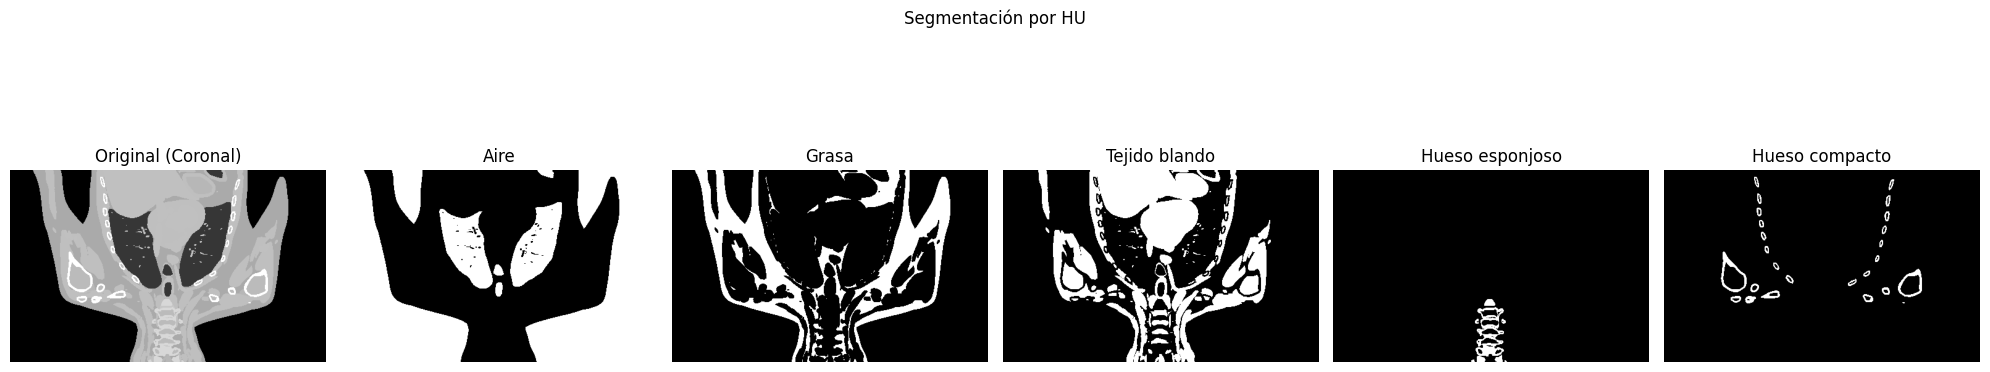

In [51]:
# Definir umbrales de HU específicos para cada tejido
umbrales_hu = {
    "aire": (-1000, -700),
    "grasa": (-120, -50),
    "tejido blando": (0, 60),
    "hueso esponjoso": (150, 300),
    "hueso compacto": (300, 1500)
}


# Realizar segmentación por HU
segmentaciones_hu = segmentacion_hu(volumen, umbrales_hu)
volumen_segmentado_Hu=segmentacion_hu(volumen, umbrales_hu)

# Mostrar las segmentaciones en el corte seleccionado
tipo_corte = "coronal"  # Cambia a "coronal" o "sagital" según prefieras
mostrar_segmentaciones(volumen, segmentaciones_hu, tipo_corte="coronal", titulo="Segmentación por HU")

In [52]:
from modules.archivo import Segmentar_Otsu
from modules.archivo import MuestraSegmentacionOtsu

Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0001.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0002.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0003.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0004.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0005.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0006.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0007.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0008.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0009.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0010.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0011.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0012.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM_template\IMG0013.dcm
Loading: C:\Users\dresv\Desktop\DICOMs\DICOMs\DICOM

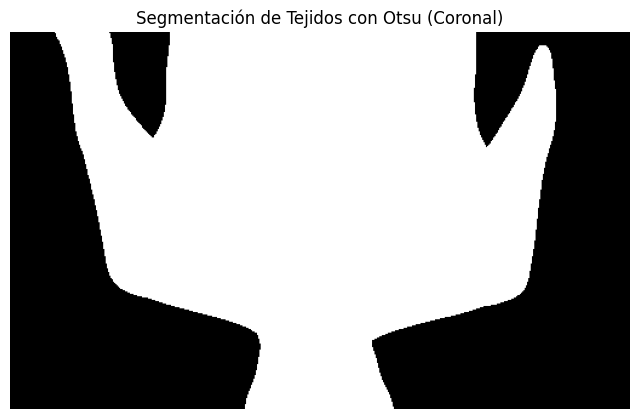

In [53]:
imagenes = Load_Slices(foldername)
volumen, img_shape, aspectos, tamaño_voxel = CreaVolumen(imagenes)

metadatos = MetadataDT(imagenes)
modalidad = metadatos['Tipo de imagen']  
paciente = metadatos['Nombre del sujeto']  

volumen_segmentado = Segmentar_Otsu(volumen)

MuestraSegmentacionOtsu(volumen_segmentado, tipo_corte="coronal", titulo="Segmentación de Tejidos con Otsu")


In [16]:
from modules.archivo import guarda_segmentaciones_hu

In [17]:

guarda_segmentaciones_hu(segmentaciones_hu, tipo_corte="sagital", carpeta_salida="dicomprueba")



Imagen guardada: dicomprueba\aire_sagital.png
Imagen guardada: dicomprueba\grasa_sagital.png
Imagen guardada: dicomprueba\tejido blando_sagital.png
Imagen guardada: dicomprueba\hueso esponjoso_sagital.png
Imagen guardada: dicomprueba\hueso compacto_sagital.png


C:\Users\dresv\Desktop\Practica_1\P1_Sistemas_Inteligentes\code\modules\archivo.py:419: UserWarning: dicomprueba\hueso compacto_sagital.png is a low contrast image
  print(f"Imagen guardada: {ruta_completa}")


In [43]:
from modules.archivo import GuardaSegmentacionOtsu

In [225]:


GuardaSegmentacionOtsu(volumen_segmentado, tipo_corte="coronal", carpeta_salida="dicom009")

Imagen guardada en: dicom009\segmentacion_coronal.png


### IMPORTANTE 
- Crea un nuevo entorno en el cual realices todos lo referente a esta práctica. Se proporciona el archivo `requirements.txt` con el cual puedes crear el nuevo entorno con los paquetes necesarios.
```bash
    conda create -n practica_1_env python=3.8
    conda activate practica_1_env
    pip install jupyter
```
- Modularizar las funciones que se incluyan en uno o varios archivos dentro de la carpeta ```modules```.
- Ejecutar las funciones mediante su importación y mostrar los resultados en un notebook de Jupyter (El notebook debe importar todas las funciones implementadas).
- Todas las funciones implementadas deben estar correctamente documentadas.


## Documentos a entregar

- Repositorio GitHub privado compartido con `davgarciagarcia` con los archivos necesarios para comprobar el correcto funcionamiento de los requisitos:
    - Notebooks de ejecución
        - Instrucciones de ejecución
        - Ejemplos de ejecución
    - Carpeta ```modules```con los módulos implementados necesarios para la ejecución.
        - Archivo `requirements.txt` en el que se incluyan los módulos necesarios para la correcta creación de un entorno virtual que permita ejecutar el código implementado.
    - Carpeta `code` con los scripts empleados para la obtención de resultados.  
    - Carpeta `results` en el que se incluyan los resultados obtenidos para cada una de las imágenes proporcionadas:
        - Carpeta DICOM_00#
            - Imagen Original
            - Imagen Segmentada por umbralización
            - Imagen Segmentada mediante Otsu.
    - **No es necesario incluir la carpeta con las imagenes Dicom.**
- En el buzón de entrega del aula virtual.
    - Documento pdf que incluya la descripción de la implementación de cada una de las funciones de segmentación con los pasos elegidos, un manual de funcionamiento y los resultados obtenidos en la visualizaciones de las imágenes y su correspondiente segmentación. 

------------------

## Fecha de entrega

- La fecha límite para la entrega de los documentos de la Práctica 1 será el **28 de octubre de 2024** a las 14:00h.
- Todos aquellos archivos que no se entreguen a través del buzón correspondiente dentro de los límites temporales establecidos, no se serán evaluados ni calificados. 
- Si no se comparte el repositorio antes de la fecha límite, la calificación será de 0.
- No se tendrán en cuenta las modificaciones realizas en el repositorio de GitHub más allá de la fecha y hora límite. 
------------------


## Rúbrica de calificación:

- Carga de imagenes DICOM y creación de volumenes **(0.75 puntos)**
- Creación de informe de datos de sujeto y adquisición **(0.5 puntos)**
- Visor de imágenes **(2.25 puntos)**
- Segmentación mediante umbralización.**(2.25 puntos)**
- Segmentación mediante Otsu. **(2.25 puntos)**
- Informe de resultados. **(2 puntos)**
    - Repositorio completo y realización de commits **(0.75 puntos)**
    - Justificación de cada una de las elecciones tomadas y valoración de los resultados obtenidos.**(1.25 puntos)**


<div class="alert alert-warning"> Sino se modularizan las funciones implementadas y la funciones no están correctamente documentadas, la calificación final podrá reducirse hasta un <b>30%</b></div>

<div class="alert alert-danger"> <b>IMPORTANTE: </b> Si se detecta plagio o copia del trabajo la calificación final de parte de prácticas de la asignatura sera de <b>0</b></div>